In [1]:
import netCDF4 as nc
import itertools
import datetime
from datetime import timedelta, date
from sifutil import haversine_dist
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
from gnone_utils import *
from CDL_utils import *
cd = cdl_utils()
a = GNOME_utils(cd)

[-87.30250549 -87.12741852 -87.81520081 -87.64704132]
[ 42.19582748  42.58731842  42.31359482  42.69667435]


c:\users\bowen\anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


IndexError: index 23 is out of bounds for axis 0 with size 23

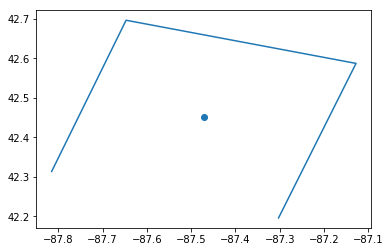

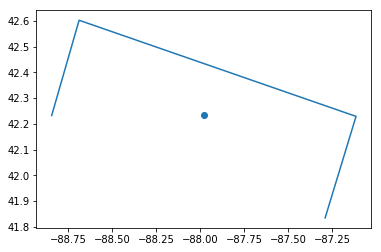

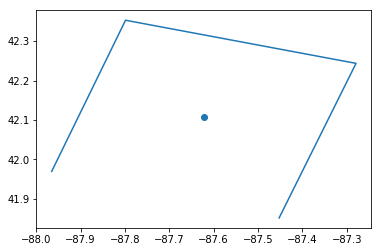

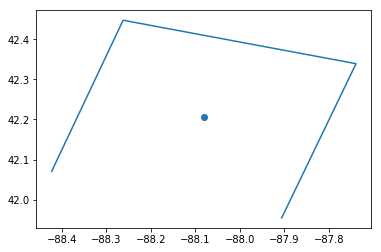

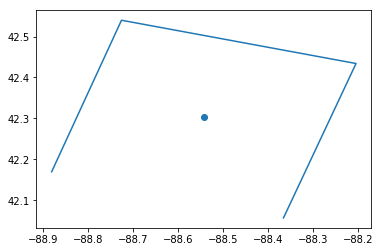

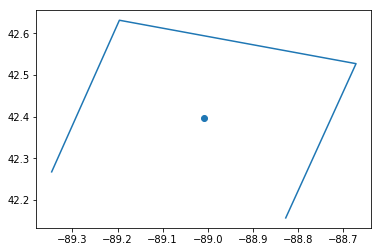

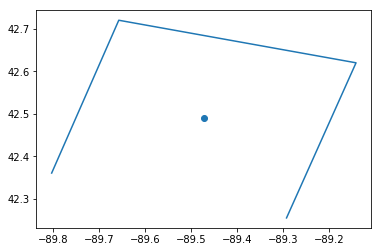

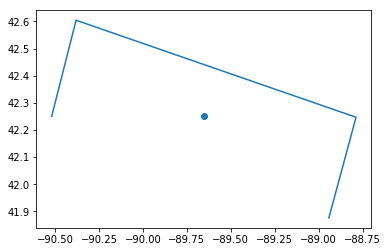

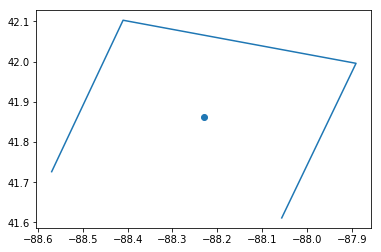

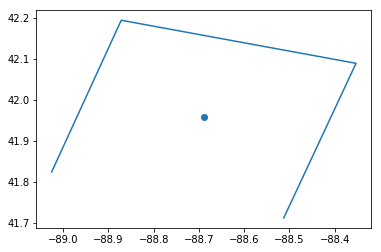

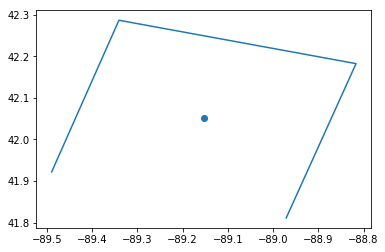

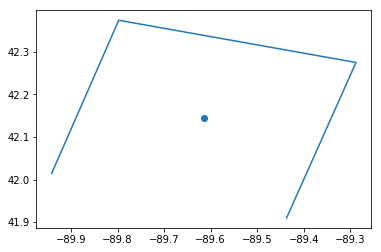

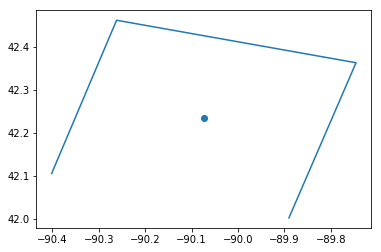

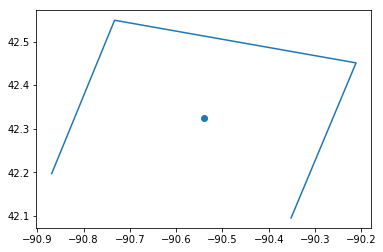

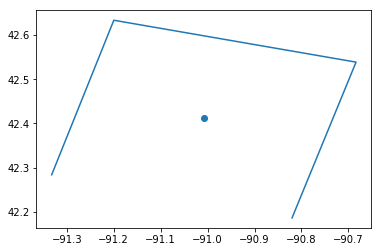

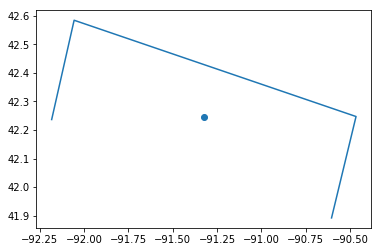

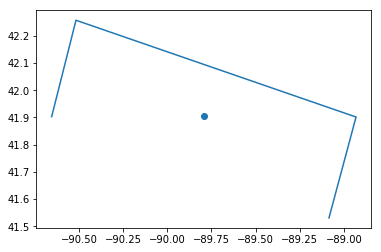

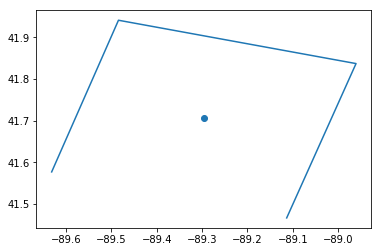

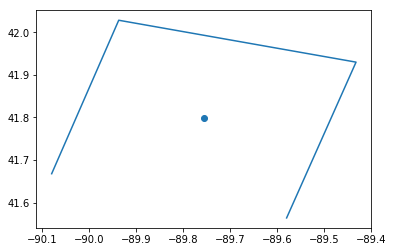

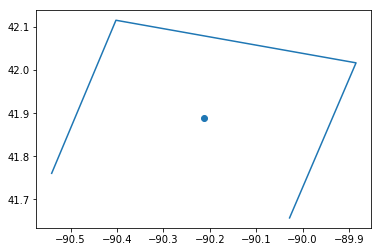

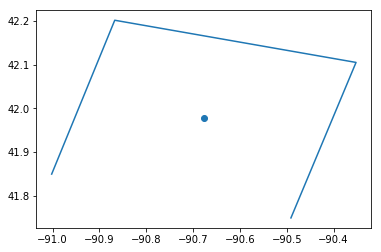

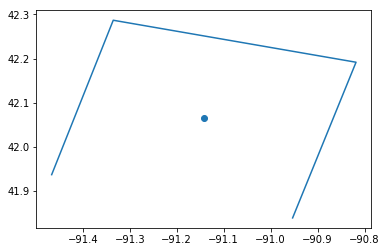

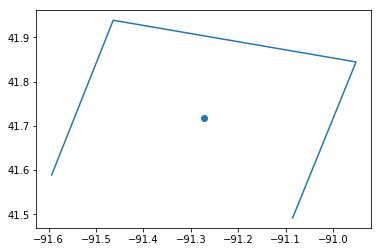

In [9]:
a.lat_corners[0]

rb ru lb lu
a.lon_corners[0]
print(a.lon_corners[0])
print(a.lat_corners[0])
c = np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])

for i in range(40):
    plt.figure()
    plt.plot(a.lon_corners[i]@c, a.lat_corners[i]@c)
    plt.scatter(a.lons[i], a.lats[i])

In [3]:
gome_path = '07\\ret_f_nr5_nsvd12_v26_waves734_nolog.20160703_v27_all.nc'
date_ = datetime.date(2016, 7, 8)
a.load_gnome(gome_path, date_)
a.get_clean_gmone_data()

True

In [104]:
data['sfc_comp_par_direct_all_3h'].shape

(2928, 7, 13)

In [23]:
a.convert_time_data(a.time)

[16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16]

In [75]:
filepath = 'PAR2016.nc'
data = {}
ds = nc.Dataset(filepath, mode='r')
for var in list(ds.variables):
    data[var] = ds[var][:]


c:\users\bowen\anaconda3\lib\site-packages\ipykernel\__main__.py:5: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
c:\users\bowen\anaconda3\lib\site-packages\ipykernel\__main__.py:5: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type


In [5]:
print(data['sfc_comp_par_direct_all_3h'].shape)

(2928, 7, 13)


In [3]:
for i in data:
    print(len(data[i]))
    
for i in data:
    print(i)
    
print(data['sfc_comp_par_direct_all_3h'][0].shape)
print(data['lon'])
print(data['lat'])

# print(data)

13
7
2928
2928
2928
lon
lat
time
sfc_comp_par_direct_all_3h
sfc_comp_par_diffuse_all_3h
(7, 13)
[ 263.5  264.5  265.5  266.5  267.5  268.5  269.5  270.5  271.5  272.5
  273.5  274.5  275.5]
[ 37.5  38.5  39.5  40.5  41.5  42.5  43.5]
OrderedDict([('lon', <class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    long_name: longitude
    standard_name: longitude
    units: degrees_east
    valid_range: [-180.  360.]
unlimited dimensions: 
current shape = (13,)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('lat', <class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    long_name: latitude
    standard_name: latitude
    units: degrees_north
    valid_range: [-90.  90.]
unlimited dimensions: 
current shape = (7,)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('time', <class 'netCDF4._netCDF4.Variable'>
float32 time(time)
    long_name: time
    standard_name: time
    units: days since 2000-03-01 00:00:00
    delta_t: 0000-00-01 00:00:00
unlimited dimens

In [30]:
prefix = 'E:\\SIF data\\GOME_2016\\GOME_2016\\'

In [3]:
gome_path = '07\\ret_f_nr5_nsvd12_v26_waves734_nolog.20160708_v27_all.nc'

In [32]:
from pyhdf.SD import SD, SDC
from netCDF4 import Dataset

In [33]:
path = prefix + gome_path
dat = Dataset(path)

In [17]:
# for i in dat.variables:
#     print(i)
    
    
# print(data['lon'])
# new_par = data['']

for i in dat.variables:
    print(i)
    print(dat.variables[i])

SIF_740
<class 'netCDF4._netCDF4.Variable'>
float32 SIF_740(Num_Observations)
    Title: SIF 
    Units: mW/m^2/nm/sr
unlimited dimensions: 
current shape = (179130,)
filling off

cloud_fraction
<class 'netCDF4._netCDF4.Variable'>
float32 cloud_fraction(Num_Observations)
    Title: Effective Cloud Fraction
    Units: none
unlimited dimensions: 
current shape = (179130,)
filling off

refl670
<class 'netCDF4._netCDF4.Variable'>
float32 refl670(Num_Observations)
    Title: refl670 (not Rayleigh corrected)
    Units: none
unlimited dimensions: 
current shape = (179130,)
filling off

refl780
<class 'netCDF4._netCDF4.Variable'>
float32 refl780(Num_Observations)
    Title: refl780 (not Rayleigh corrected)
    Units: none
unlimited dimensions: 
current shape = (179130,)
filling off

SZA
<class 'netCDF4._netCDF4.Variable'>
float32 SZA(Num_Observations)
    Title: solar zenith angle
    Units: degrees
unlimited dimensions: 
current shape = (179130,)
filling off

VZA
<class 'netCDF4._netCDF4.Vari

In [42]:
print(dat.variables['longitude'])
# https://avdc.gsfc.nasa.gov/pub/data/satellite/MetOp/GOME_F/v27/MetOp-A/

# time = [int(i[0])*10 + int(i[1]) for i in dat.variables['time'][:]]

# for i in dat.variables['time'][:]:
#     print(i)

<class 'netCDF4._netCDF4.Variable'>
float32 longitude(Num_Observations)
    Title: Longitude
    Units: Degrees E
unlimited dimensions: 
current shape = (179130,)
filling off



In [23]:
# dat.variables['Latitude_corners']
# time = np.array(time)
import matplotlib.pyplot as plt
%matplotlib inline
# plt.hist(time)

array([ 5784.0625,  5784.1875,  5784.3125, ...,  6149.6875,  6149.8125,
        6149.9375], dtype=float32)

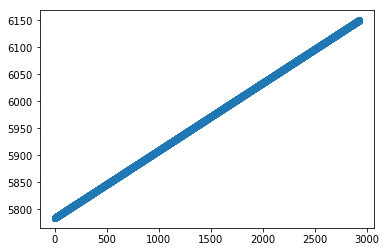

In [27]:
np.array(data['time'])
plt.scatter(np.arange(2928), np.array(data['time']))


np.array(data['time'])
# plt.xlabel('par observation')
# plt.title('PAR time')

Text(0.5,0,'gonme observations')

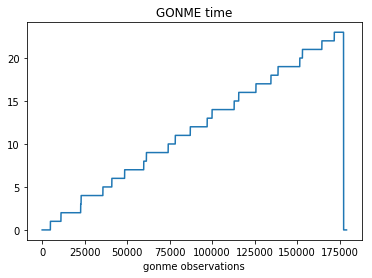

In [36]:
plt.plot(time)
plt.title('GONME time')
plt.xlabel('gonme observations')

In [30]:
# time = [''.j for i in dat.variables['time'][:]
        
print(type(dat.variables['time'][:][0][0]))

print(dat.variables['time'][:])

NameError: name 'dat' is not defined

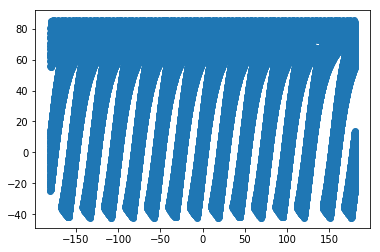

In [38]:
plt.scatter(dat.variables['longitude'][:], dat.variables['latitude'])

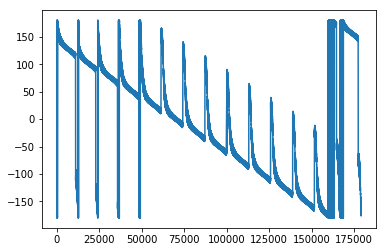

In [41]:
plt.plot(dat.variables['longitude'][:])

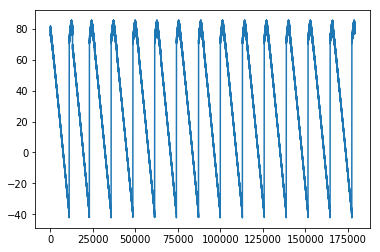

In [43]:
plt.plot(dat.variables['latitude'][:])

In [6]:
from shapely.geometry import Polygon

In [9]:
a = Polygon(((0,0), (10,0), (10,10),(0,10)))
b = Polygon(((3,0), (11,0), (12, 9), (4,9)))

In [90]:
min(data['time'])

5784.0625

In [117]:
base_date = datetime.date(2016, 1, 1)
date_value = (cur_date-base_date).days*8 + hour//3

print(date_value)

2926.0


In [116]:
cur_date = datetime.date(2016,12,31)
hour = 20.59

In [97]:
(date-base_date).days

5784

In [47]:
import numpy as np
a = np.array([[1,2,3], [2,3,4], [4,5,6]])
b = np.array([0,2])
a[b]

array([[1, 2, 3],
       [4, 5, 6]])

In [76]:
data_lons = dat.variables['longitude'][:]
data_lats = dat.variables['latitude'][:]
l = np.concatenate((data_lons.reshape(-1,1), data_lats.reshape(-1,1)), axis = 1)
# data_lats.reshape(-1,1).shape
np.where(l )

array([[-166.33377075,   75.60034943],
       [-166.48991394,   75.65412903],
       [-167.19509888,   75.96609497],
       ..., 
       [-157.5136261 ,   79.37258911],
       [-155.22566223,   78.26472473],
       [-153.33369446,   77.14334106]], dtype=float32)

In [79]:
a  = np.array([1,2,3])
np.where((a > 1) & (a < 3))

(array([1], dtype=int64),)

In [80]:
b = np.array([2,3,4])
np.intersect1d(a,b)

array([2, 3])

In [33]:
start_date = datetime.date(2000, 3, 1)
day_count = 10
for single_date in (start_date + timedelta(n) for n in range(day_count)):
    print(single_date.year)

2000
2000
2000
2000
2000
2000
2000
2000
2000
2000


In [34]:
import math

In [36]:
a = np.array([[1,0], ])

15

In [55]:
a.lon_corners

array([[-87.30250549, -87.12741852, -87.81520081, -87.64704132],
       [-87.29138947, -87.11585236, -88.84397888, -88.6882782 ],
       [-87.45240784, -87.27909851, -87.96497345, -87.79853821],
       [-87.9058609 , -87.73866272, -88.42308807, -88.26241302],
       [-88.36627197, -88.20490265, -88.88181305, -88.72653198],
       [-88.82702637, -88.67111969, -89.34614563, -89.19594574],
       [-89.29315186, -89.14237976, -89.80265808, -89.65707397],
       [-88.94192505, -88.78726196, -90.5194397 , -90.38052368],
       [-88.05671692, -87.89125061, -88.56905365, -88.40999603],
       [-88.51251984, -88.35277557, -89.02545929, -88.87172699],
       [-88.97094727, -88.81659698, -89.48948669, -89.34078979],
       [-89.43675995, -89.28751373, -89.9415741 , -89.79742432],
       [-89.89033508, -89.74568939, -90.40170288, -90.26181793],
       [-90.35173035, -90.21139526, -90.86908722, -90.7331543 ],
       [-90.82012939, -90.68379974, -91.33207703, -91.19970703],
       [-90.60479736, -90

In [56]:
c = np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])


a.lon_corners@c

array([[-87.30250549, -87.12741852, -87.64704132, -87.81520081],
       [-87.29138947, -87.11585236, -88.6882782 , -88.84397888],
       [-87.45240784, -87.27909851, -87.79853821, -87.96497345],
       [-87.9058609 , -87.73866272, -88.26241302, -88.42308807],
       [-88.36627197, -88.20490265, -88.72653198, -88.88181305],
       [-88.82702637, -88.67111969, -89.19594574, -89.34614563],
       [-89.29315186, -89.14237976, -89.65707397, -89.80265808],
       [-88.94192505, -88.78726196, -90.38052368, -90.5194397 ],
       [-88.05671692, -87.89125061, -88.40999603, -88.56905365],
       [-88.51251984, -88.35277557, -88.87172699, -89.02545929],
       [-88.97094727, -88.81659698, -89.34078979, -89.48948669],
       [-89.43675995, -89.28751373, -89.79742432, -89.9415741 ],
       [-89.89033508, -89.74568939, -90.26181793, -90.40170288],
       [-90.35173035, -90.21139526, -90.7331543 , -90.86908722],
       [-90.82012939, -90.68379974, -91.19970703, -91.33207703],
       [-90.60479736, -90

In [70]:
l = np.array([[1,10,11,2]])
lo = np.array([[0,0,11,10]])
np.vstack((l, lo))

array([[ 1, 10, 11,  2],
       [ 0,  0, 11, 10]])

In [71]:
a = Polygon(np.vstack((l,lo)).T)

In [78]:
a = np.array([[1,2],[3,4]])
a[[1,1]]

array([[3, 4],
       [3, 4]])

In [9]:
import Par_util

In [10]:
a = Par_utils()

NameError: name 'Par_utils' is not defined